In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from matplotlib_venn import venn3, venn3_circles
from util.api import get_lts_list
pd.options.mode.chained_assignment = None


%matplotlib inline
plt.style.use('classic')

In [2]:
lts_list = get_lts_list()
df_list = []
df_by_category_list = []

for idx, lts in enumerate(lts_list):
    df = pd.read_pickle(f'../../data/dfs/lts-{lts}/lts-{lts}.df')
    df_list.append(df)

# Research Questions (RQs)

- **RQ 1.** What packages are the most used? Which of them are outside from the Stackage selection?
- **RQ 2.** How many dependencies of packages are outside from the Stackage selection (in)directly?
- **RQ 3.** How frequently are the packages updated? 

Regarding monads, we analyze the evolution of dependencies of monad modules available in the mtl package:
- **RQ 4.** How have these monad packages evolved?
- **RQ 5.** How has the use of monads evolved?
- **RQ 6.** How many packages that depend on the mtl and transformers packages are added and removed in Stackage? How many packages that depended on these monads package stopped their dependencies?

## RQ 4. How have these monad packages evolved?

Para esta pregunta se utilizaron los datos de las dependencias de los paquetes de cada LTS. El objetivo era realizar un Diagrama de Venn por lo tanto se realizo un contador para cada combinación posible con los paquetes de mónadas a estudiar, hay que considerar que free y monad-control se contaron como el estudio de un solo paquete al no ser tan populares como mtl y transformers. El ultimo paso fue utilizando los contadores generar el Diagrama de Venn, y para medir la evolución de estos paquetes se seleccionaron 3 LTS para representar la evolución

In [6]:
index = [0,10,21] #Indice de las LTS que se utilizan para el diagrama de Venn
list_pkg_mon = []

for i in index:
    count_T = count_mtl = count_FM = count_T_mtl = count_T_FM = count_FM_mtl = count_T_mtl_FM = 0
    for idx,row in df_list[i].iterrows():
        deps = row['deps']        
        if 'transformers' in deps and 'mtl' in deps and ('free' in deps or 'monad-control' in deps):
            count_T_mtl_FM+=1
        elif 'transformers' in deps and 'mtl' in deps:
            count_T_mtl+=1
        elif 'transformers' in deps and ('free' in deps or 'monad-control' in deps):
            count_T_FM+=1
        elif ('free' in deps or 'monad-control' in deps) and 'mtl' in deps:
            count_FM_mtl+=1
        elif ('free' in deps or 'monad-control' in deps):
            count_FM+=1
        elif 'transformers' in deps:
            count_T+=1
        elif 'mtl' in deps:
            count_mtl+=1
        
    order = [count_T,count_mtl,count_T_mtl,count_FM,count_T_FM,count_FM_mtl,count_T_mtl_FM]
    list_pkg_mon.append(order)


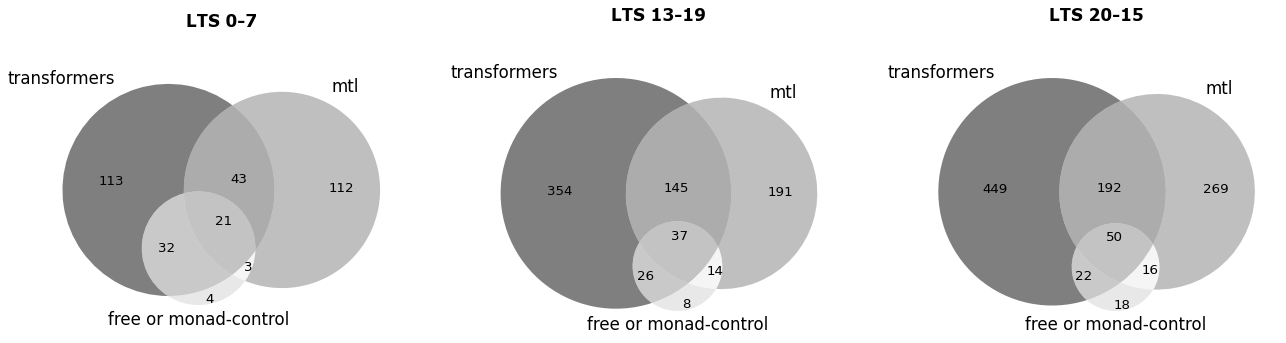

In [7]:
fig = plt.figure(figsize=(20,6), facecolor="white")

for i in range(len(list_pkg_mon)):  
    plt.subplot(1,3,i+1)
    
    vd3 = venn3(subsets=list_pkg_mon[i],set_labels = ('transformers', 'mtl', 'free or monad-control'), 
                set_colors=('black', 'grey', 'lightgrey'),alpha = 0.5)
    for text in vd3.set_labels:
        text.set_fontsize(15)
    plt.title('LTS '+lts_list[index[i]],fontname='Verdana',fontweight='bold', fontsize=15, pad=30,color='black')


plt.savefig("../../graphs/rq4_Venn_Diagram.pdf", format='pdf', bbox_inches='tight')
plt.show()